## Milestone 1 - Data Sanity ( by using Numpy and Pandas)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the CSV file as a DataFrame
df = pd.read_csv('C:/Users/KIIT/OneDrive/Desktop/HRC/projct/Final.csv')
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


In [4]:
# See the description of the DataFrame
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [5]:
# See the shape of the DataFrame
df.shape

(1101925, 16)

In [6]:
# See the information about the DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [7]:
# Check for null values in the DataFrame
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [8]:
# Replace all null values with NaN
df.replace(to_replace=[None, ''], value=np.nan, inplace=True)

In [9]:
# Change the format of ORDER_CREATION_DATE to datetime[64] with format "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

In [10]:
# Change the format of REQUESTED_DELIVERY_DATE to datetime[64] with format "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

In [11]:
# Count how many records have order date greater than delivery date
print((df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum())

27142


In [12]:
# Remove records where order date is greater than delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [13]:
# Count records where "ORDER_AMOUNT" field has "-"
print(df[df["ORDER_AMOUNT"] == "-"].shape[0])

0


In [14]:
# Replace "-" with empty string in "ORDER_AMOUNT" field
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace("-", "")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\3449716171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace("-", "")


In [15]:
# Count the number of records with ","
comma_count = df['ORDER_AMOUNT'].str.contains(",", na=False).sum()
comma_count

1073406

In [16]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\4011245428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\4011245428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric


In [17]:
# Count the number of records where order date and delivery date are the same
same_date_count = (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()
same_date_count

100437

In [18]:
# Count the number of records for each currency type
currency_counts = df['ORDER_CURRENCY'].value_counts()
currency_counts

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [19]:
# Create a new column 'amount_in_usd' and convert non-USD currencies to USD
conversion_rate = {
    'USD': 1.0,
    'EUR': 1.18,
    'AUD': 0.75,
    'CAD': 0.80,
    'GBP': 1.37,
    'MYR': 0.24,
    'PLN': 0.26,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.09,
    'RON': 0.24,
    'SGD': 0.74,
    'CZK': 0.045,
    'HU1': 0.0036,
    'NZD': 0.70,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.32,
    'SEK': 0.11
}
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric
df['AMOUNT_IN_USD'] = df.apply(lambda row: row['ORDER_AMOUNT'] * conversion_rate.get(row['ORDER_CURRENCY'], np.nan), axis=1)
df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\3603351914.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\3603351914.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMOUNT_IN_USD'] = df.apply(lambda row: row['ORDER_AMOUNT'] * conversion_rate.get(row['ORDER_CURRENCY'], np.nan), axis=1)


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1126.4398
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,929.0848
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,79642.2828
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1658.5372
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000


In [20]:
# Check for values "0" in the 'amount_in_usd' column
zero_amount_count = (df['AMOUNT_IN_USD'] == 0).sum()
zero_amount_count

237821

In [21]:
# Create a new column 'unique_cust_id' by combining 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)
df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\1844027466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1126.4398,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,929.0848,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,79642.2828,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1658.5372,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260


## Milestone 2 - EDA

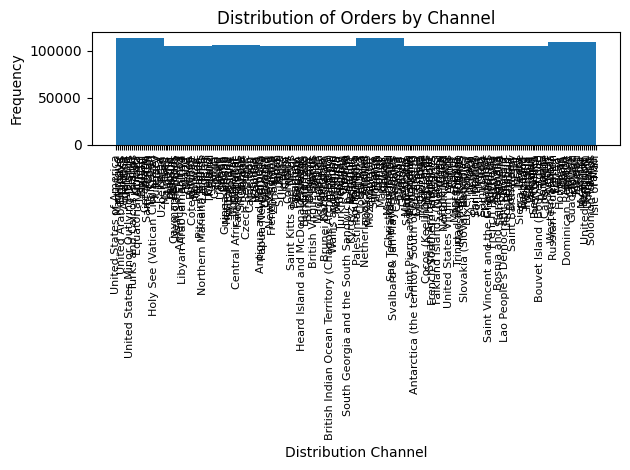

In [25]:
# Create a Histogram on DISTRIBUTION_CHANNEL
# plt.figure(figsize=(10, 6))  # Increase the figure size
plt.hist(df['DISTRIBUTION_CHANNEL'])
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
plt.title('Distribution of Orders by Channel')
plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()

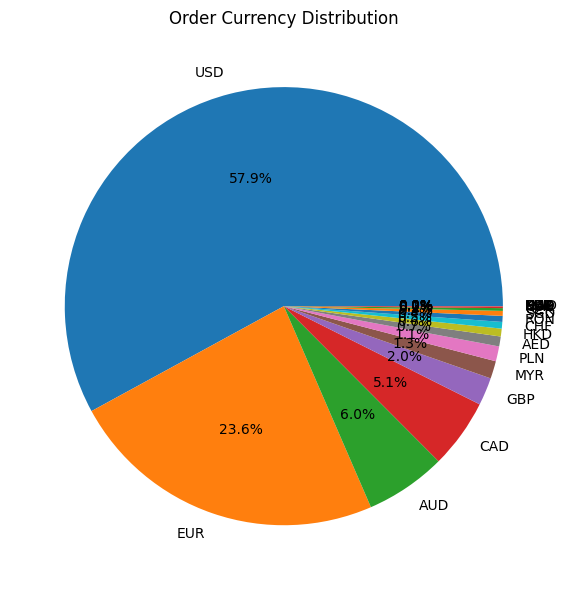

In [26]:
# Create a Pie Chart on ORDER_CURRENCY
plt.figure(figsize=(6, 6))  # Increase the figure size
currency_counts = df['ORDER_CURRENCY'].value_counts()
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%')
plt.title('Order Currency Distribution')
plt.tight_layout()
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11492\2978027094.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing between subplots


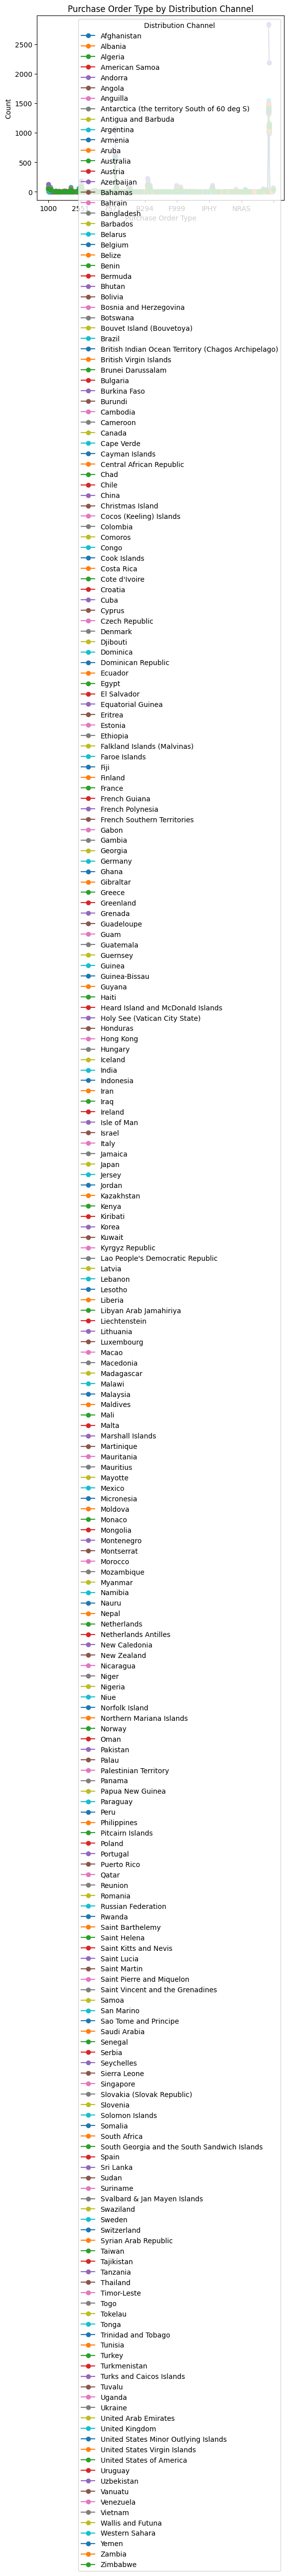

In [24]:
# Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
grouped = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().unstack()
grouped.plot(kind='line', marker='o')
plt.xlabel('Purchase Order Type')
plt.ylabel('Count')
plt.title('Purchase Order Type by Distribution Channel')
plt.legend(title='Distribution Channel')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Q1

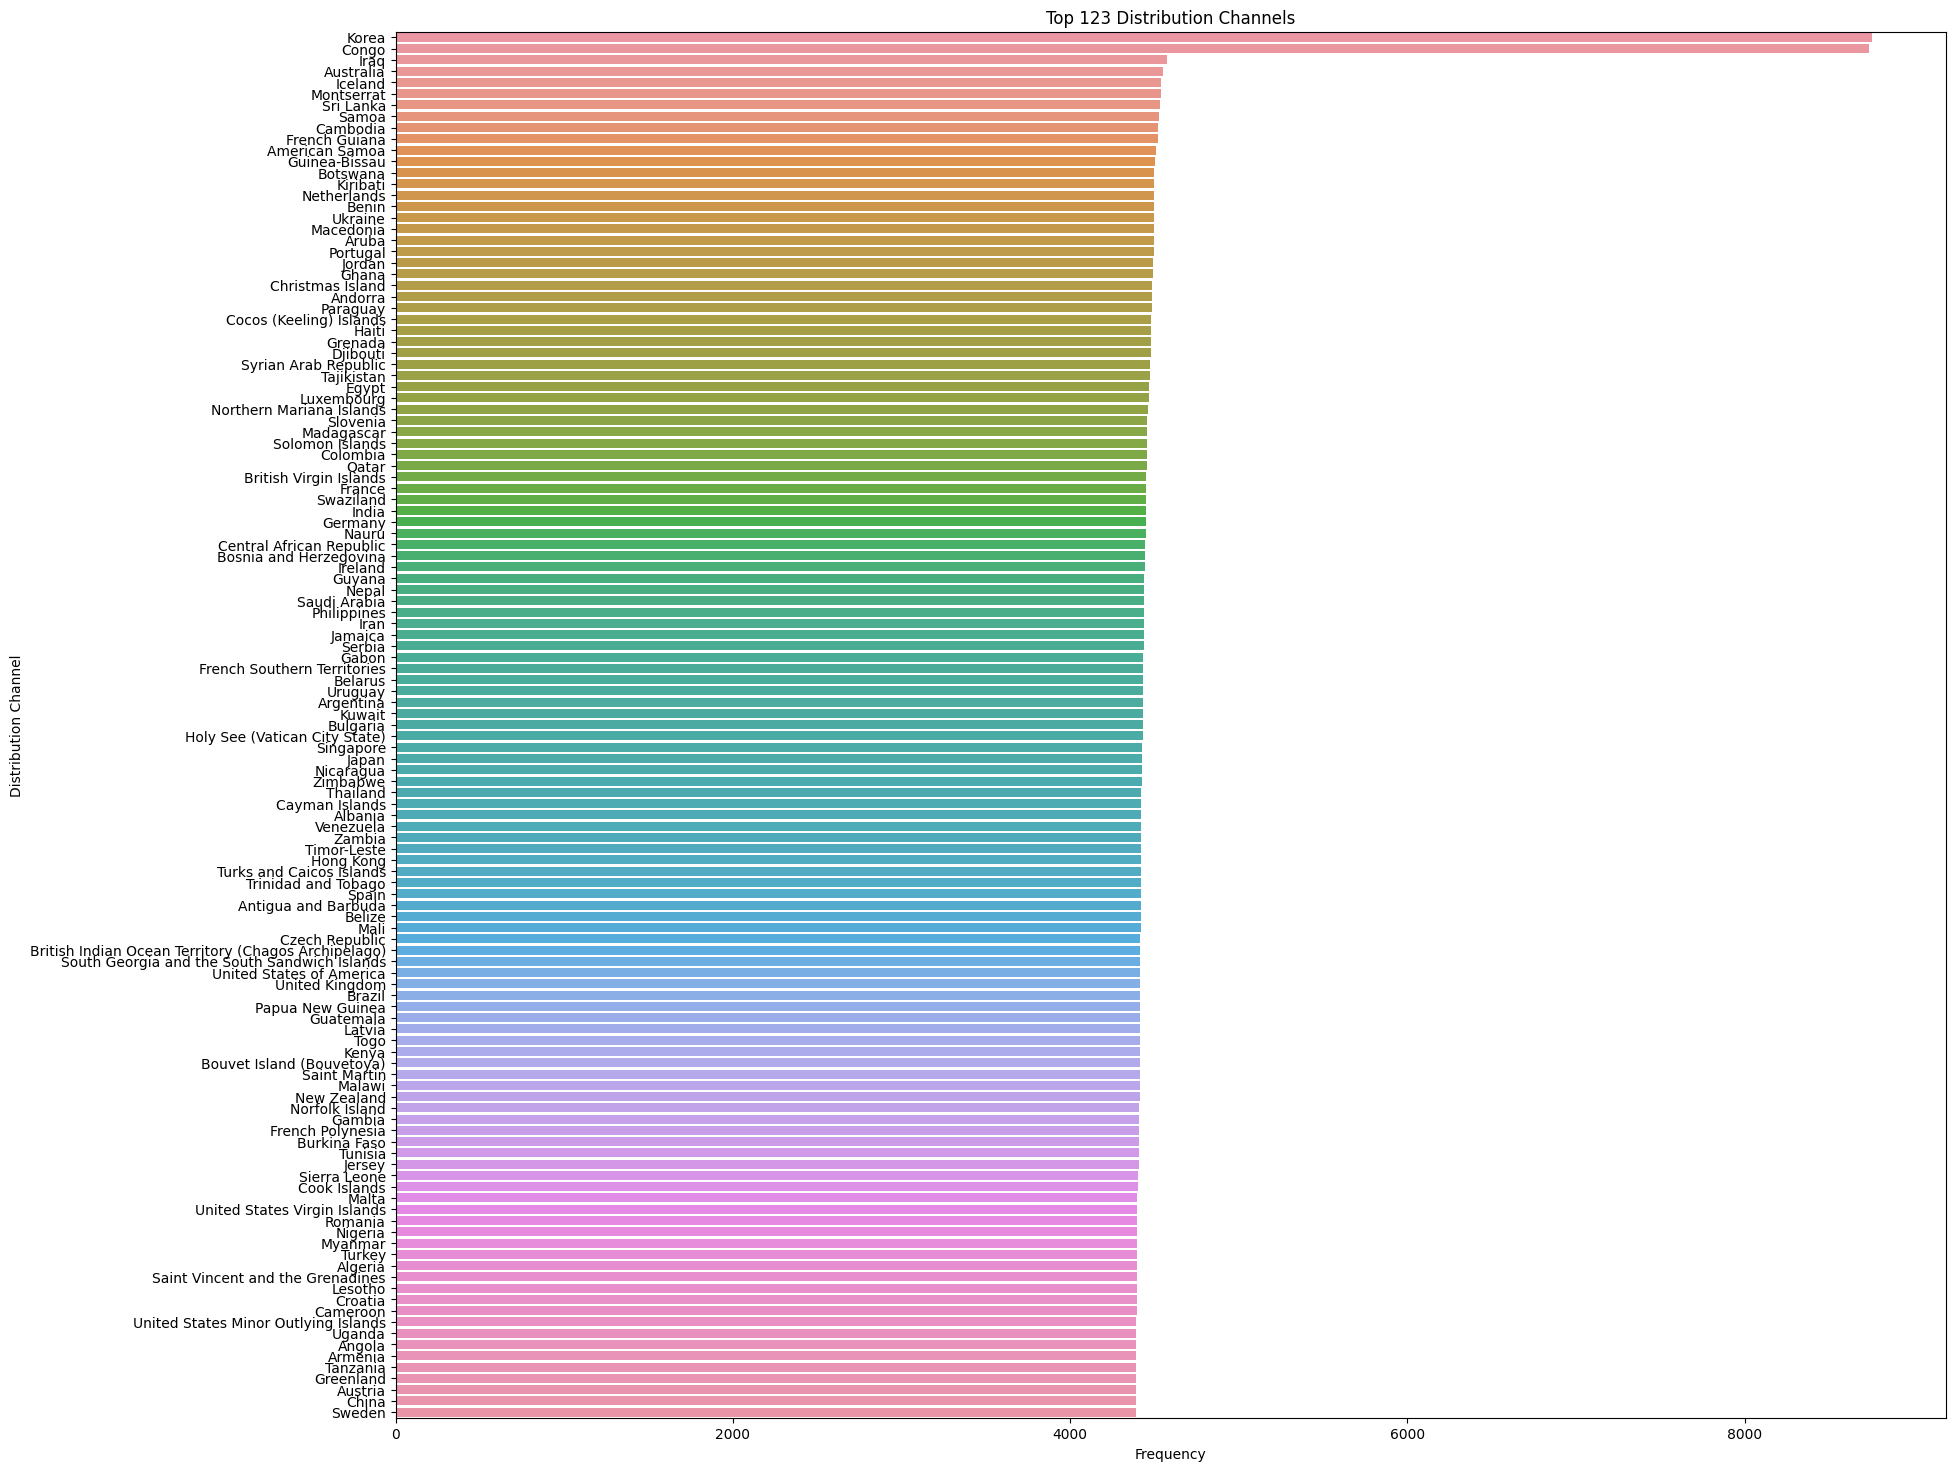

In [38]:
import statistics
Median = statistics.median(df['DISTRIBUTION_CHANNEL'].value_counts())
# Count the frequency of each value in the DISTRIBUTION_CHANNEL column
counts = df['DISTRIBUTION_CHANNEL'].value_counts()

# Filter out the values that occur less frequently than a certain threshold
threshold = Median
counts = counts[counts >= threshold]

# Plot a horizontal bar chart to show the top N values by frequency
plt.figure(figsize=(20, 18))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('Frequency')
plt.ylabel('Distribution Channel')
plt.title(f'Top {len(counts)} Distribution Channels')
plt.show()



Q2

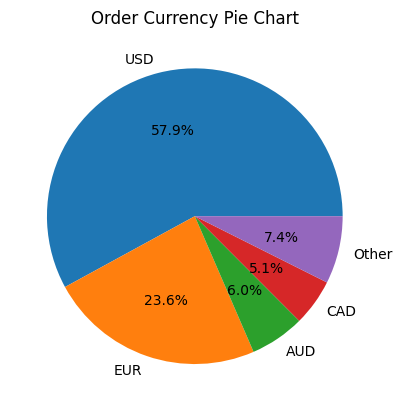

In [30]:
# Get value counts for ORDER_CURRENCY column
currency_count = df['ORDER_CURRENCY'].value_counts()

# Group values that appear less than 5% of the time into "Other" category
threshold = 0.05
small_values = currency_count[currency_count < threshold * currency_count.sum()]
currency_count['Other'] = small_values.sum()
currency_count.drop(index=small_values.index, inplace=True)

# Create pie chart
plt.pie(currency_count.values, labels=currency_count.index, autopct='%1.1f%%')
plt.title('Order Currency Pie Chart')

# Display chart
plt.show()

Q3

<AxesSubplot:xlabel='DISTRIBUTION_CHANNEL', ylabel='PURCHASE_ORDER_TYPE'>

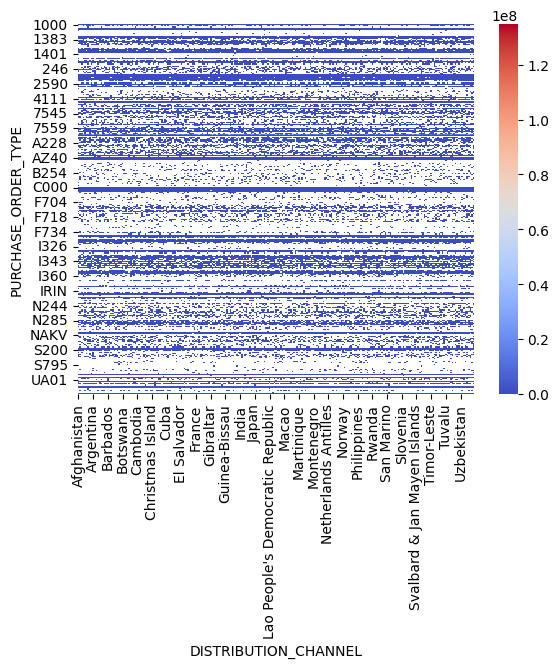

In [39]:
# Aggregate the data by grouping it by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
grouped_df = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).agg({'ORDER_AMOUNT': 'sum'})

# Reset the index to turn the grouped columns into regular columns
grouped_df = grouped_df.reset_index()

# Pivot the table to make PURCHASE_ORDER_TYPE the x-axis, DISTRIBUTION_CHANNEL the y-axis, and ORDER_AMOUNT the color
pivot_df = grouped_df.pivot(index='PURCHASE_ORDER_TYPE', columns='DISTRIBUTION_CHANNEL', values='ORDER_AMOUNT')

# Plot the resulting heatmap
sns.heatmap(pivot_df, cmap='coolwarm')

Q3.1

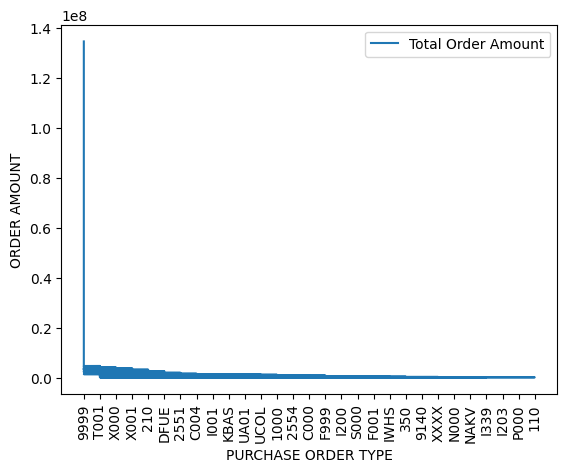

In [40]:
# Group by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL, and calculate total ORDER_AMOUNT
grouped_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['ORDER_AMOUNT'].sum()

# Sort the data in descending order of ORDER_AMOUNT and select top 5 values
top_data = grouped_data.sort_values(ascending=False)[:1500]

# Reset the index
top_data = top_data.reset_index()

# Create a line chart
plt.plot(top_data['PURCHASE_ORDER_TYPE'], top_data['ORDER_AMOUNT'], label='Total Order Amount')
plt.xticks(rotation=90)
plt.xlabel('PURCHASE ORDER TYPE')
plt.ylabel('ORDER AMOUNT')
plt.legend()
plt.show()

Q4

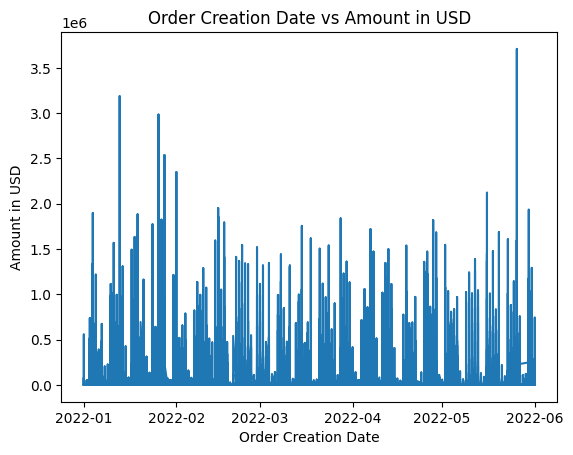

In [31]:
plt.plot(df['ORDER_CREATION_DATE'], df['AMOUNT_IN_USD'])
plt.title('Order Creation Date vs Amount in USD')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.show()

Q5

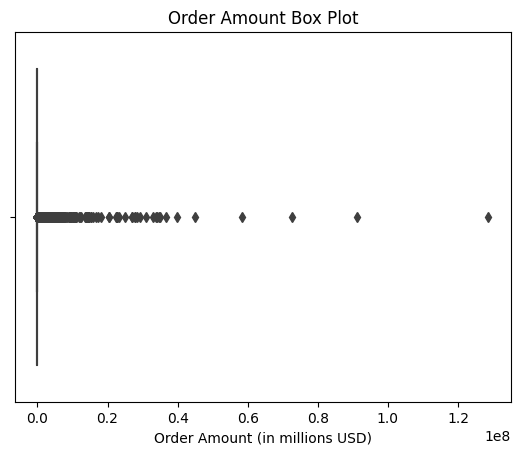

In [33]:
# Set y-axis limits to exclude outliers
plt.ylim(0, df['ORDER_AMOUNT'].quantile(0.95)) 

# Create a box plot using Seaborn
sns.boxplot(data=df, x='ORDER_AMOUNT')
plt.title('Order Amount Box Plot')
plt.xlabel('Order Amount (in millions USD)')
plt.show()


Q6

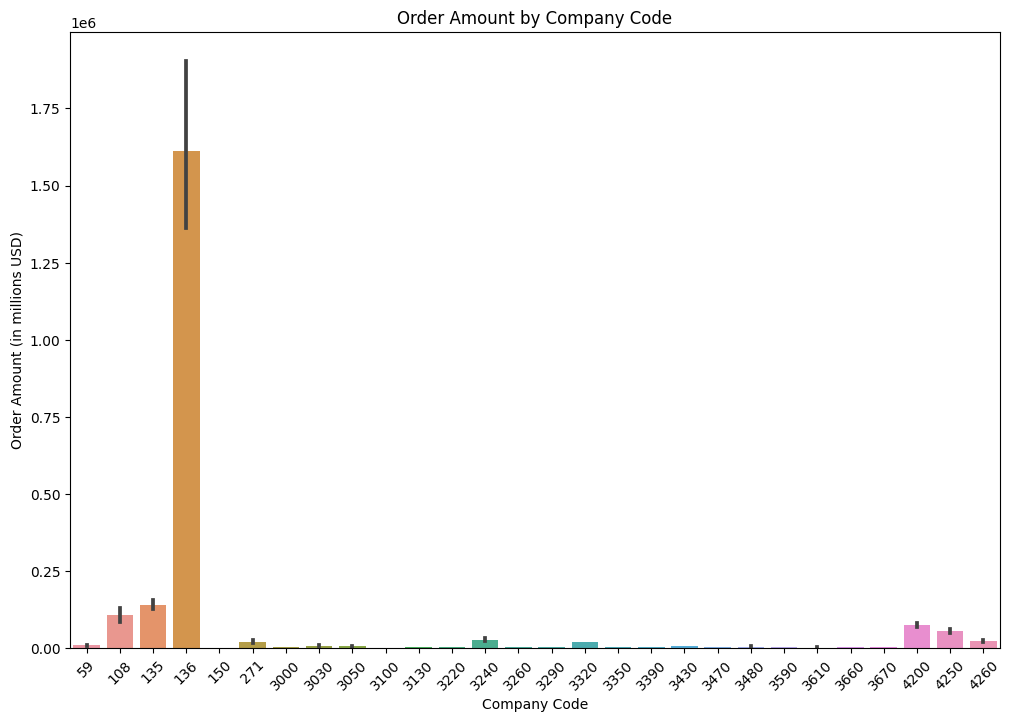

In [34]:
# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)
plt.xlabel('Company Code')
plt.ylabel('Order Amount (in millions USD)')
plt.title('Order Amount by Company Code')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


Q5